In [123]:
import matplotlib as mpl
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy.interpolate import make_interp_spline, BSpline
from tsmoothie.smoother import *
from scipy.ndimage.filters import gaussian_filter1d


/var/folders/w0/xfxq9pjn1ts7f3sx0vhcmh3w0000gn/T/ipykernel_92963/271890794.py:9: DeprecationWarning: Please use `gaussian_filter1d` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter1d


In [124]:
os.chdir('/Users/eslamabousamra/rt_frq_dyn_datasets/ncov-forecasting-fit')

In [125]:
error_dat = pd.read_csv("estimates/model_scores_output3.csv")
display(error_dat)

,location,model,pivot_date,lead,variant,MAE,RMSE
0,USA,GARW,2022-04-15,-13,Delta,NaN,NaN
1,USA,GARW,2022-04-15,-12,Delta,NaN,NaN
2,USA,GARW,2022-04-15,-11,Delta,NaN,NaN
3,USA,GARW,2022-04-15,-10,Delta,NaN,NaN
4,USA,GARW,2022-04-15,-9,Delta,NaN,NaN
...,...,...,...,...,...,...,...
19301,United Kingdom,FGA,2022-06-30,10,other,NaN,NaN
19302,United Kingdom,FGA,2022-06-30,11,other,NaN,NaN
19303,United Kingdom,FGA,2022-06-30,12,other,NaN,NaN
19304,United Kingdom,FGA,2022-06-30,13,other,NaN,NaN


In [126]:
v_colors = ["#56e39f", "#89CFF0", "#C70039",  "#5567aa", "#c5d46f", "#aa34a4", "#808080"]
v_names = ['Delta', 
           'Omicron 21L', 
           'Omicron 21K', 
           'Omicron 22A', 
           'Omicron 22B', 
           'Omicron 22C', 
           'other']
color_map = {v : c for c, v in zip(v_colors, v_names)}

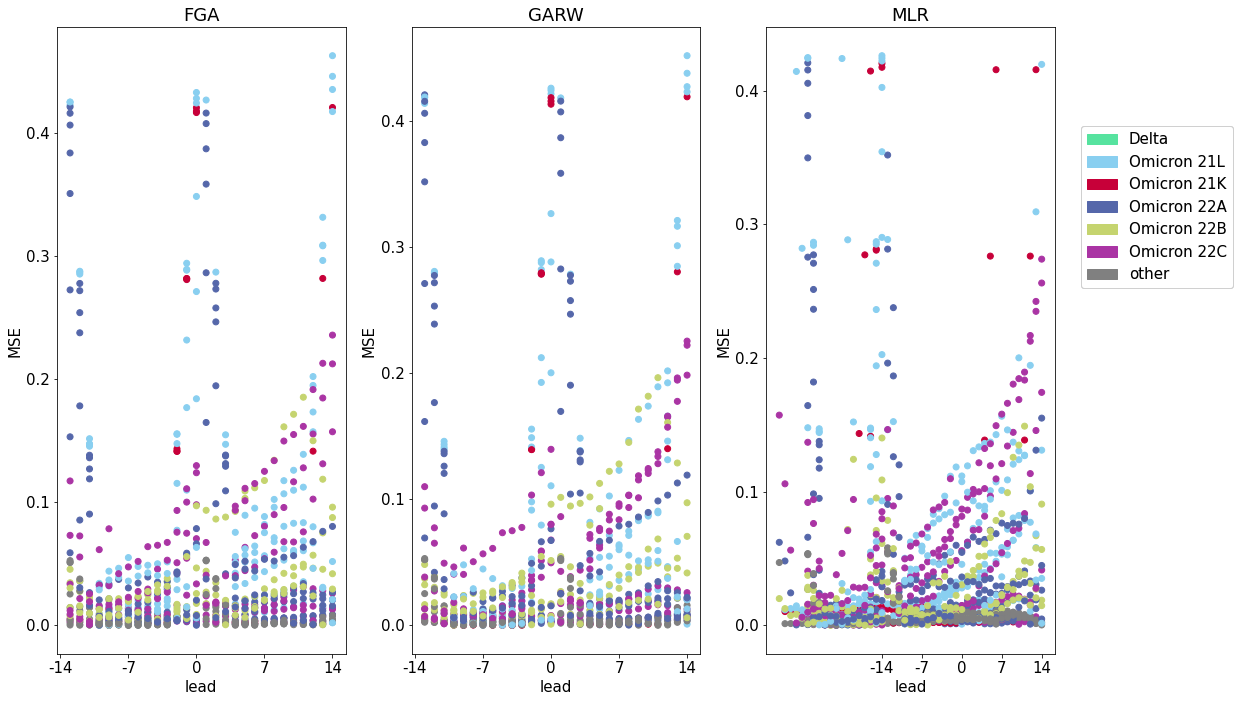

In [127]:
def plot_variant_error(error_dat, location, color_map):
    
    fig = plt.figure(figsize=(15, 10))
    #filter data
    plot_data = error_dat[error_dat['location']== location]
    #plot_data = plot_data[plot_data['model']=='GARW']
    #plot_data = plot_data[plot_data['variant']=='Omicron 21L']
    
    #Group by model
    
    grouped = plot_data.groupby(['model']) 
    
    
    #Get number of groups for axes size
    n_groups = grouped.ngroups
    gs = fig.add_gridspec(ncols=n_groups, nrows = 1)

    #Loop over group
    for n, (name, group) in enumerate(grouped): 
        
        ax = fig.add_subplot(gs[n], sharex=None)
        #plotting scatter plot of lead and MAE
        ax.scatter(x = group['lead'], y = group['MAE'], c =[color_map[v] for v in group['variant']])
        
        #add mean
        
        
        
        #for _,g in group.groupby('pivot_date'):
            
        #    ax.plot(g['lead'],g['MAE'], color ="k")
            

        
        
        # violin plot
        #violin_data= [group[group['lead']==l].MAE.values for l in np.arange(-14,14,1)]
        #      
        #parts = ax.violinplot(
        #violin_data, showmeans=False, showmedians=False,
        #showextrema=False)

        #for pc in parts['bodies']:
         #   pc.set_facecolor('#D43F3A')
         #   pc.set_edgecolor('black')
         #   pc.set_alpha(1)

            
            
        ## construct x-ticks to be weeks:
        ax.set_xticks(np.arange(-14, 15, 7))
        ax.set_xticklabels(np.arange(-14,15,7))
        ax.set_title(name)
        ax.set_xlabel("lead")
        ax.set_ylabel("MSE")
        patches = [mpl.patches.Patch(color=c, label=l) for l, c in color_map.items()]
        fig.legend(patches, list(color_map.keys()), ncol=1, loc="center right", bbox_to_anchor=(1.15, 0.7), borderaxespad=0)


    fig.tight_layout()
    return fig

fig= plot_variant_error(error_dat, 'United Kingdom', color_map)
mpl.rc('font', size=15)
#fig.savefig('variant_MSE.png', dpi = 100)


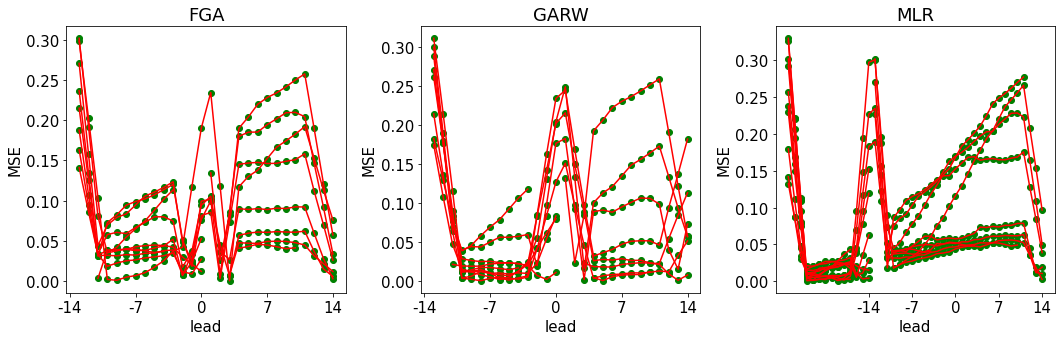

In [128]:
def plot_error(error_dat, location):
    
    fig = plt.figure(figsize=(15, 5))
    #filter data
    plot_data = error_dat[error_dat['location']== location]
    plot_data = plot_data[plot_data['variant']=='Omicron 21L']
    
    #Group by model
    
    grouped = plot_data.groupby(['model']) 
    
    
    #Get number of groups for axes size
    n_groups = grouped.ngroups
    gs = fig.add_gridspec(ncols=n_groups, nrows = 1)

    #Loop over group
    for n, (name, group) in enumerate(grouped): 
        
        ax = fig.add_subplot(gs[n], sharex=None)
        #plotting scatter plot of lead and MAE##
        ax.scatter(x = group['lead'], y = group['MAE'], c ='green')
        #ax.xlim(0,0.2)
        #add mean
        
        #y_mean = [np.mean(group['MAE'])]*len(group['lead'])
        #ysmoothed = gaussian_filter1d(group['MAE'], sigma=4)
        #spl = make_interp_spline(group['MAE'],group['lead'], k = 3)
        #mean_line = ax.plot(group['lead'],ysmoothed, label='Mean', linestyle='--')


        #add lines for scatterplot
        for _,g in group.groupby('pivot_date'):
            
            ax.plot(g['lead'],g['MAE'], color ="red")
            

            
            
        ## construct x-ticks to be weeks:
        ax.set_xticks(np.arange(-14, 15, 7))
        ax.set_xticklabels(np.arange(-14,15,7))
        ax.set_title(name)
        ax.set_xlabel("lead")
        ax.set_ylabel("MSE")

        
    fig.tight_layout()
    return fig

fig= plot_error(error_dat, 'USA')
mpl.rc('font', size=15)
fig.savefig('model_comp_example.png', dpi = 100)

ValueError: zero-size array to reduction operation minimum which has no identity

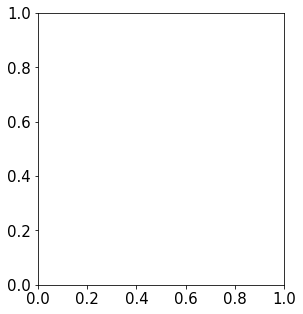

In [129]:
def plot_error_violin(error_dat, location):
    
    fig = plt.figure(figsize=(15, 5))
    #filter data
    plot_data = error_dat[error_dat['location']== location]
    plot_data = plot_data[plot_data['variant']=='Omicron 21L']
    
    #Group by model
    
    grouped = plot_data.groupby(['model']) 
    
    
    #Get number of groups for axes size
    n_groups = grouped.ngroups
    gs = fig.add_gridspec(ncols=n_groups, nrows = 1)

    #Loop over group
    for n, (name, group) in enumerate(grouped): 
        
        ax = fig.add_subplot(gs[n], sharex=None)
        #plotting scatter plot of lead and MAE##
        
        # violin plot
        violin_data= [group[group['lead']==l].MAE.values for l in np.arange(-14,14,1)]
        #      
        parts = ax.violinplot(
        violin_data, showmeans=False, showmedians=False,
        showextrema=False)

        #for pc in parts['bodies']:
         #   pc.set_facecolor('#D43F3A')
         #   pc.set_edgecolor('black')
         #   pc.set_alpha(1)

            
            
        ## construct x-ticks to be weeks:
        ax.set_xticks(np.arange(-14, 15, 7))
        ax.set_xticklabels(np.arange(-14,15,7))
        ax.set_title(name)
        ax.set_xlabel("lead")
        ax.set_ylabel("MSE")

        
    fig.tight_layout()
    return fig

fig= plot_error_violin(error_dat, 'USA')
mpl.rc('font', size=15)
fig.savefig('model_comp_example.png', dpi = 100)

In [130]:
def plot_error_boxplot(ax, error_dat, location):
    
    
    #filter data
    plot_data = error_dat[error_dat['location']== location]
    plot_data = plot_data[plot_data['variant']=='Omicron 21L']
    
    #Group by model
    
    
    
    grouped = plot_data.groupby(['model']) 

    
    
    #Get number of groups for axes size
    n_groups = grouped.ngroups
    gs = fig.add_gridspec(ncols=n_groups, nrows = 1)

    #Loop over group
    for n, (name, group) in enumerate(grouped): 
    #    
        ax = fig.add_subplot(gs[n], sharex=None)
        #plotting scatter plot of lead and MAE##
        sns.boxplot(x=grouped['lead'],y=grouped['MAE'])
#
    #    ax.boxplot(plot_data)
    #        
    #    ## construct x-ticks to be weeks:
    #    ax.set_xticks(np.arange(-14, 15, 7))
    #    ax.set_xticklabels(np.arange(-14,15,7))
    #    ax.set_title(name)
    #    ax.set_xlabel("lead")
    #    ax.set_ylabel("MSE")

        
    fig.tight_layout()
    return fig

fig, ax = fig.add_subplot(figsize=(15, 5))
plot_error_boxplot(error_dat, 'USA')

#mpl.rc('font', size=15)
#fig.savefig('model_comp_example.png', dpi = 100)

AttributeError: 'AxesSubplot' object has no property 'figsize'

TypeError: 'AxesSubplot' object is not subscriptable

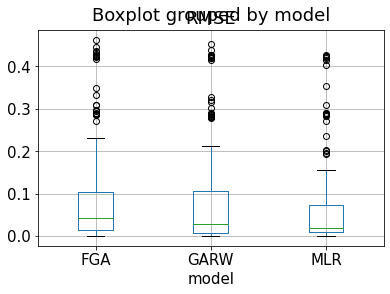

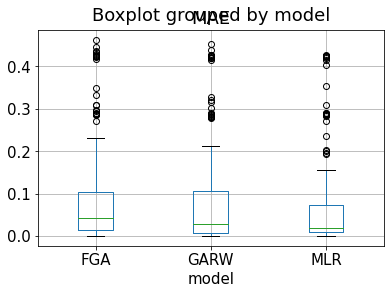

In [131]:


plot_data = error_dat[error_dat['location']== 'United Kingdom']
plot_data = plot_data[plot_data['variant']=='Omicron 21L']
box1 = plot_data.boxplot(column='RMSE', by='model')
box2 = plot_data.boxplot(column='MAE', by='model')
set_box_color(box1, '#D7191C') # colors are from http://colorbrewer2.org/
set_box_color(box2, '#2C7BB6')



TypeError: positions should be an iterable of numbers

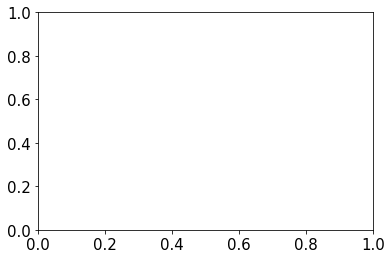

In [122]:
plot_data = error_dat[error_dat['location']== 'United Kingdom']
plot_data = plot_data[plot_data['variant']=='Omicron 21L']

for n, grp in plot_data.groupby('model'):
    plt.boxplot(x='lead', data=grp, positions=[n])
plt.xticks([1, 2], ['Label 1', 'Label 2'])
